In [1]:
from arepy.read_write import binary_read as rsnap
from arepy.visualize import data_inspection
from arepy.utility import cgs_constants as cgs
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib as mpl
import scipy.constants as const
import astropy.units as u
import matplotlib.colors as mc
from fiesta import arepo, units
from fil_finder import FilFinder2D
from radfil import plummer
from astropy.io import fits
from spectral_cube import Projection
from fil_finder.filfinder3D import FilFinder3D
#import pyvista as pv
#from pyvistaqt import BackgroundPlotter
#import glue as gl
#from filfinder3D import FilFinder3D

ModuleNotFoundError: No module named 'glue'

Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/GAL_randC_250
Particles [15069278        0        0        0        0      163]
Masses [0. 0. 0. 0. 0. 0.]
Gas particles 15069278
Sink particles 163
Time =  [2.28085692]
Precision: Double
ID type:  <class 'numpy.uint32'>
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_250
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xHP_proj_250
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xH2_proj_250
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xCO_proj_250
1000 1000
-2302424300000000.0 6.3253676e+21


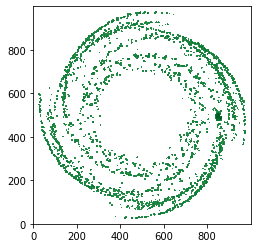

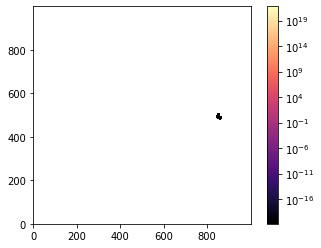

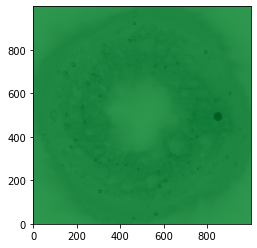

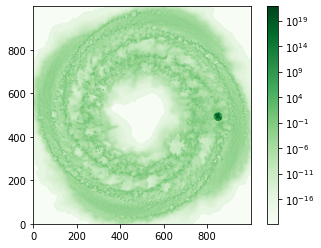

In [4]:
'''
UnitLength_in_cm         3.0856e+20
UnitMass_in_g            1.991E33           ;  1.0e10 solar masses
UnitVelocity_in_cm_per_s 1.0e+5       ;  1 km/sec
GravityConstantInternal  0
'''
Arepo_length = 3.0856e20*u.cm
Arepo_mass = 1.991e33*u.g
Arepo_vel = 1.0e+5*u.m/u.s

units.set_AREPO_VELOCITY(Arepo_vel)
units.set_AREPO_MASS(Arepo_mass)
units.set_AREPO_LENGTH(Arepo_length)
ndensity_unit=u.cm**-3
mp = 1.67e-24*u.g
io_flags = {'grav_potential'      : False,
            'mc_tracer'           : False,
            'time_steps'          : True,
            'sgchem'              : True,
            'variable_metallicity': False,
            'sgchem_NL99'         : False
            }
base = '/cosma7/data/dp058/dc-mari5/example_run/snapshots/'
filenum = '250'
snap_name = 'GAL_randC_'
fname = base+snap_name+filenum
data, header = rsnap.read_snapshot(fname, io_flags = io_flags)
xH2, xHp, xCO = data['chem'].T    #these are abundances of molecular hydrogen, Hplus, and CO relative to the number of protons
xHe=0.1
mp = 1.6726231e-24
kb = 1.3806485e-16
xHI = 1 - xHp -2*xH2    #abundance of HI from conservation lawa


sink_start = int(header['num_particles'][-1])
sink_locs = data['pos'][-sink_start:]
sink_mass = data['mass'][-sink_start:]
sink_x = sink_locs[:,0]
sink_y = sink_locs[:,1]
sink_z = sink_locs[:,2]
loc = data['pos'][:-sink_start]
rho = data['rho'] #[:-163]
mass = data['mass'][:-sink_start]
cell_radius = (3*mass*(Arepo_length**3)/(4*np.pi*rho))**(1/3)
ndens = ((rho*Arepo_mass/(Arepo_length**3))/((1. + 4.0 * xHe) * mp*u.g)).to(ndensity_unit).value






ABHE=0.1

ColumnDensity = rsnap.read_image(base + 'density_proj_' + filenum)
xHp_proj = rsnap.read_image(base + 'xHP_proj_' + filenum)
xH2_proj = rsnap.read_image(base + 'xH2_proj_' + filenum)
xCO_proj = rsnap.read_image(base + 'xCO_proj_' + filenum)
    
NH = ((ColumnDensity * rsnap.arepoColumnDensity) / ((1.+4.*ABHE)*cgs.mp))
Ndensity = NH * (1. + ABHE - xH2_proj + xHp_proj)
print(np.min(xH2_proj*NH), np.max(xH2_proj*NH))
#levels=np.logspace(18,23,256)
norm=mpl.colors.LogNorm()
plt.imshow(xH2_proj*NH, cmap='Greens',norm=norm,origin='lower')
plt.show()
plt.imshow(xCO_proj, cmap='magma',norm=norm,origin='lower')
plt.colorbar()
plt.show()
plt.imshow(xHp_proj*NH, cmap='Greens',norm=norm,origin='lower')
plt.show()
plt.imshow(Ndensity, cmap='Greens',norm=norm,origin='lower')
plt.colorbar()
plt.show()

In [3]:

base = '/cosma7/data/dp058/dc-mari5/example_run_cubic/snapshots/'

grid = arepo.ArepoCubicGrid(base + 'density_grid_' + filenum)

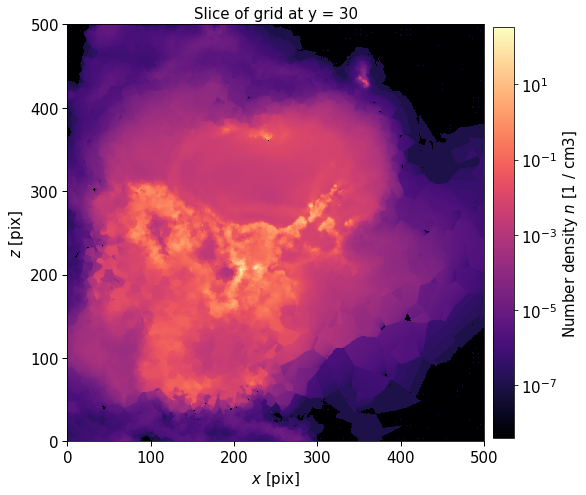

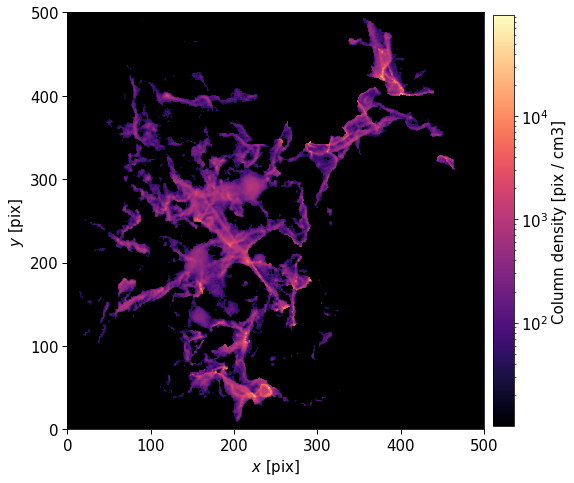

In [45]:
fig = grid.plot_slice(y = 30,
                      log = True)
fig.show()
fig = grid.plot_projection(projection='z', log = True, mask_below = 10*u.cm**-3)
fig.show()


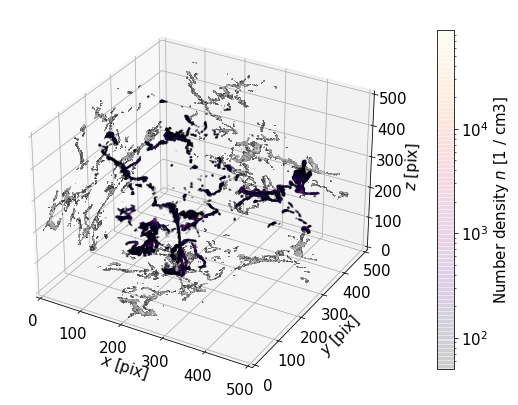

In [19]:
grid.plot_grid(log = True, mask_below = 10*u.cm**-3)
fig.show()

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


(500, 500, 500)
(500, 500, 500)


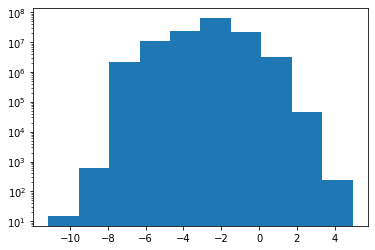

In [5]:
hdu = fits.open('example_test_grid.fits')[0]
hdr = hdu.header
fits_data = hdu.data
ndens_data = fits_data/((1. + 4.0 * xHe) * mp)
shape = np.shape(ndens_data)
flat = ndens_data.reshape(shape[0]*shape[1]*shape[2])
flat = np.log10(flat)
plt.hist(flat)
plt.yscale('log')

dimentions = np.shape(ndens_data)
print(dimentions)


In [63]:
side = 500

x=[]
y=[]
z=[]
for i in range(side):
    for k in range (side):
        for j in range(side):
            x.append(i)
            y.append(k)
            z.append(j)


In [37]:
def mask_data(data, thresh):
    mask = data[...] < thresh
    masked_data = data.copy
    masked_data[mask] = np.nan
    return masked_data
def create_mask(data, thresh):
    mask = data[...] < thresh
    return mask

In [42]:
mask = create_mask(ndens_data, 10)
fil = FilFinder3D(ndens_data, mask=mask)
fil.create_mask(use_existing_mask = True)
fil.create_skeleton()
skl = fil.skeleton()
fil.analyse_skeleton(min_length = 10, verbose = True)
skl_prune = fil.skeleton()

6.0249968e-05


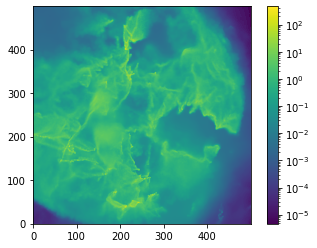

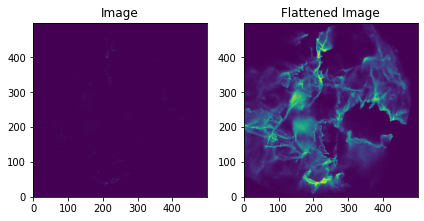

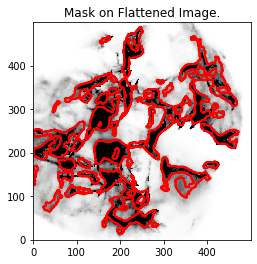

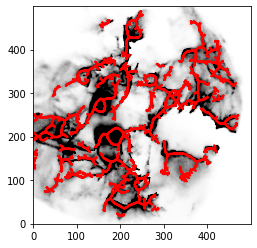

/cosma/home/dp058/dc-mari5/.local/lib/python3.6/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


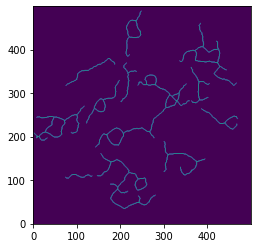

In [2]:
hdu = fits.open('example_test_grid.fits')[0]
hdr = hdu.header
fits_data = hdu.data
norm=mpl.colors.LogNorm()
#x-axis = 0, y-axis = 1, z-axis = 2
proj = ['x', 'y', 'z']
for i in range(1):
    proj = np.sum(fits_data, axis = i)
    proj *= (.7*u.kpc).to(u.cm).value
    print(proj[0,0])
    plt.imshow(proj, origin = 'lower', norm = norm)
    plt.colorbar()
    plt.show()
    fil = FilFinder2D(proj, beamwidth=1*u.pix)
    fil.preprocess_image(flatten_percent=96)
    plt.subplot(121)
    plt.imshow(fil.image.value, origin='lower')
    plt.title("Image")
    plt.subplot(122)
    plt.imshow(fil.flat_img.value, origin='lower')
    plt.title("Flattened Image")
    plt.tight_layout()
    plt.show()
    fil.create_mask(verbose=True, 
                    glob_thresh = 0.5, 
                    adapt_thresh = 4*u.pix,
                    smooth_size = 4*u.pix,
                    size_thresh = 70*u.pix**2,
                    regrid = True,
                    border_masking = False,
                    fill_hole_size = 25*u.pix**2)
    fil.medskel(verbose=True)
    fil.analyze_skeletons(prune_criteria = 'length',
                          skel_thresh =100*u.pix,
                          branch_thresh = 15*u.pix,
                          max_prune_iter = 1000
                          )
    #fil1 = fil.filaments[0]
    #fil1.skeleton_analysis(fil.image, verbose=True, branch_thresh=5 * u.pix, prune_criteria='length')
    '''
    fil.analyze_skeletons(prune_criteria = 'all',
                          relintens_thresh = 0.6,
                          )
    '''
    plt.imshow(fil.skeleton, origin='lower')
    plt.show()
    length_pix = fil.branch_properties['length']
    branch_num = fil.branch_properties['number']
    
    

#proj = Projection.from_hdu(hdu)
#print(np.shape(proj))
#fil = FilFinder2D(hdu)

dict_keys(['length', 'intensity', 'pixels', 'number'])
12
[<Quantity [105.05382387,  48.52691193,  16.48528137,  27.38477631,
            89.66904756,   2.        ,  18.48528137,  43.35533906,
            26.72792206,  51.87005769,  57.42640687,  31.21320344] pix>, <Quantity [63.69848481, 43.97056275, 20.48528137, 70.87005769, 33.14213562] pix>, <Quantity [73.01219331] pix>, <Quantity [45.45584412, 71.18376618, 17.3137085 , 47.9411255 , 67.9411255 ,
           69.84062043, 31.14213562, 29.3137085 , 37.45584412, 11.89949494,
           18.72792206,  3.82842712, 15.89949494, 41.45584412, 28.79898987,
           26.72792206, 17.82842712, 63.28427125] pix>, <Quantity [24.14213562,  1.41421356, 78.42640687,  0.5       ,  0.5       ,
           17.3137085 ,  9.89949494, 57.69848481, 40.627417  , 31.38477631,
           25.72792206, 43.55634919, 26.21320344] pix>, <Quantity [38.69848481, 67.66904756, 38.04163056] pix>, <Quantity [40.45584412, 50.627417  , 32.627417  , 72.11269837] pix>, <Quan

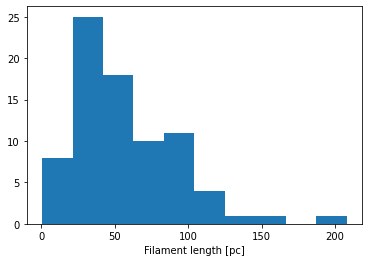

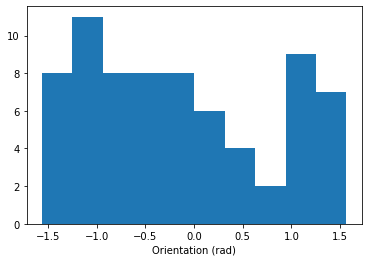

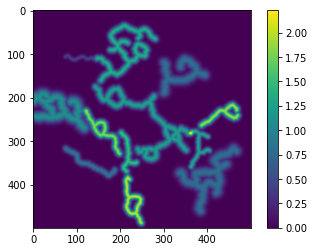

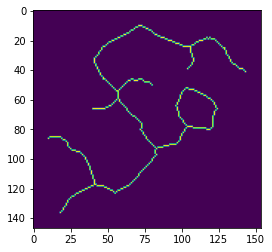

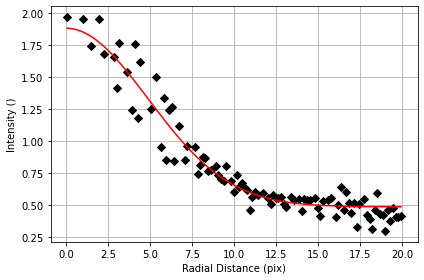

(<Quantity 11.46552876 pix>, <Quantity 0.30598002 pix>)
gaussian_bkg


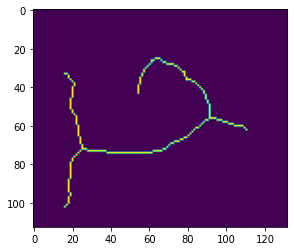

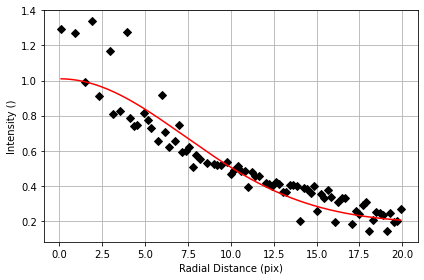

(<Quantity 17.11591078 pix>, <Quantity 1.0028288 pix>)
gaussian_bkg


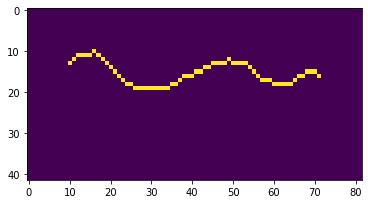

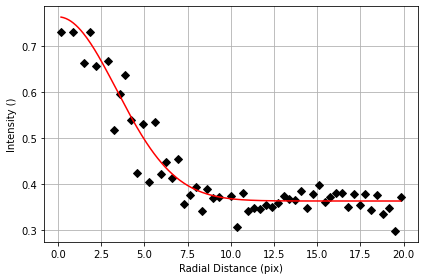

(<Quantity 7.94010239 pix>, <Quantity 0.63217269 pix>)
gaussian_bkg


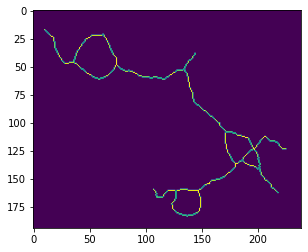

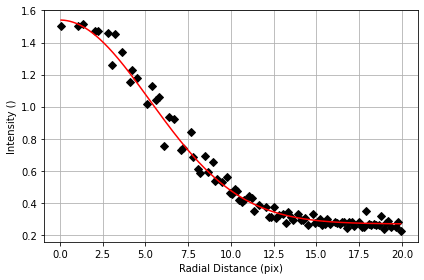

(<Quantity 12.37268939 pix>, <Quantity 0.18776407 pix>)
gaussian_bkg


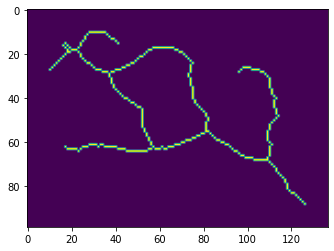

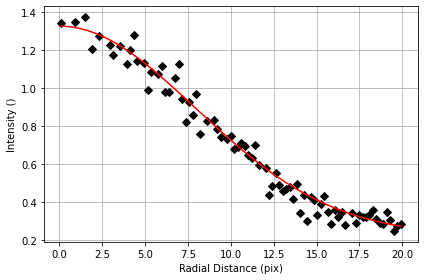

(<Quantity 18.75375417 pix>, <Quantity 0.47155425 pix>)
gaussian_bkg


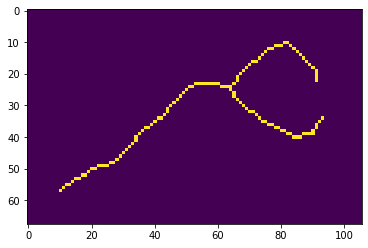

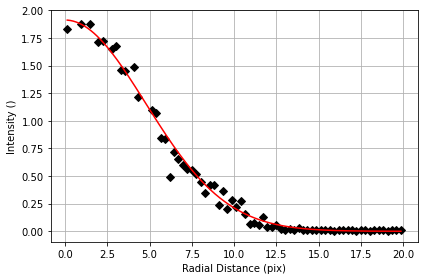

(<Quantity 11.22437091 pix>, <Quantity 0.135623 pix>)
gaussian_bkg


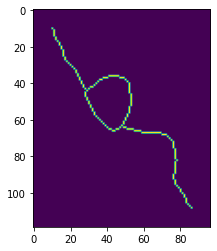

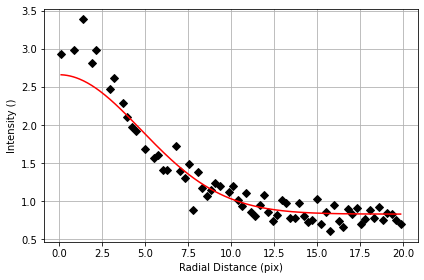

(<Quantity 11.2077795 pix>, <Quantity 0.47159389 pix>)
gaussian_bkg


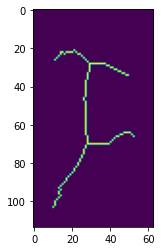

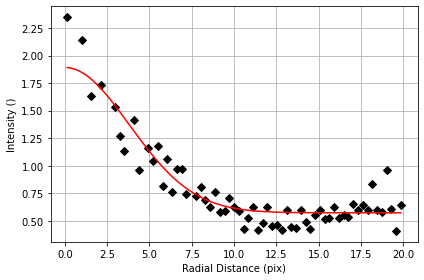

(<Quantity 8.95420837 pix>, <Quantity 0.42207303 pix>)
gaussian_bkg


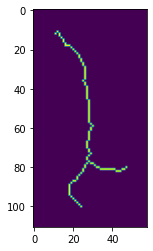

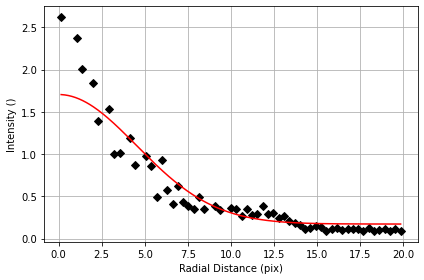

(<Quantity 10.6473345 pix>, <Quantity 0.42428191 pix>)
gaussian_bkg


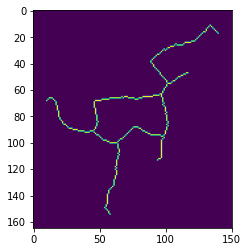

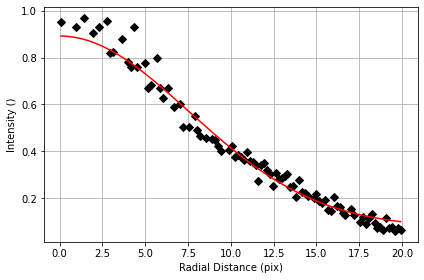

(<Quantity 17.76517164 pix>, <Quantity 0.41529248 pix>)
gaussian_bkg


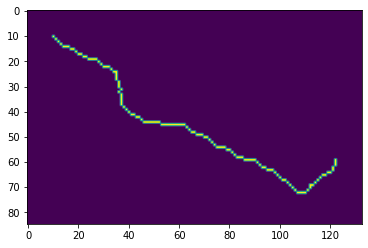

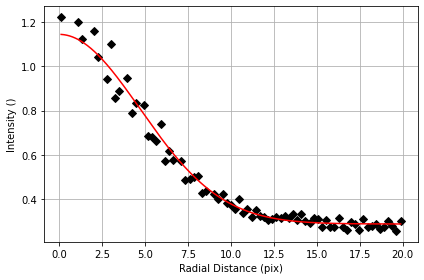

(<Quantity 11.1106696 pix>, <Quantity 0.20407748 pix>)
gaussian_bkg


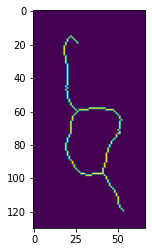

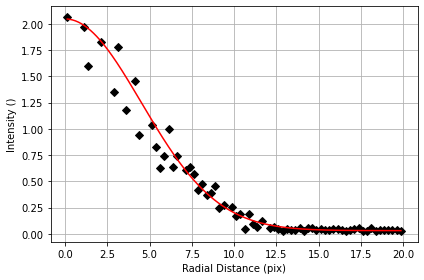

(<Quantity 10.59203096 pix>, <Quantity 0.17701216 pix>)
gaussian_bkg


In [26]:
print(fil.branch_properties.keys())
print(fil.number_of_filaments)
print(length_pix)
print(fil.branch_properties['length'])
ls = []
for i in fil.branch_properties['length']:
    for j in i:
        ls.append(j.value*700/500)
plt.hist(ls)
plt.xlabel('Filament length [pc]')
plt.show()
fil.exec_rht(branches=True, min_branch_length=15 * u.pix)
orientations = []
for i in fil.orientation_branches:
    for j in i:
        if not np.isnan(j):
            orientations.append(j.value)
plt.hist(orientations)
plt.xlabel("Orientation (rad)")
plt.show()
fil.find_widths(max_dist = 20*u.pix,
                try_nonparam  = True,
                add_width_to_length = False,
                deconvolve_width = False,
#                fit_model = plummer.Plummer1D()
               )
fil.widths()
fil_mod = fil.filament_model()
plt.imshow(fil_mod)
plt.colorbar()
plt.show()
for i in range (fil.number_of_filaments):
    filament = fil.filaments[i]
    plt.imshow(filament.skeleton(pad_size=10))
    plt.show()
    filament.plot_radial_profile(xunit=u.pix)
    print(filament.radprof_fwhm(u.pix))
    print(filament.radprof_type)

In [6]:
fil.widths()

(<Quantity [11.46552876, 17.11591078,  7.94010239, 12.37268939, 18.75375417,
            11.22437091, 11.2077795 ,  8.95420837, 10.6473345 , 17.76517164,
            11.1106696 , 10.59203096] pix>,
 <Quantity [0.30598002, 1.0028288 , 0.63217269, 0.18776407, 0.47155425,
            0.135623  , 0.47159389, 0.42207303, 0.42428191, 0.41529248,
            0.20407748, 0.17701216] pix>)

In [ ]:
velocity_grid_250

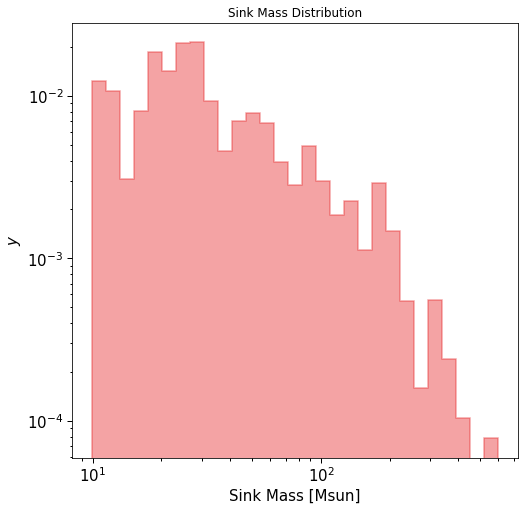

15061464


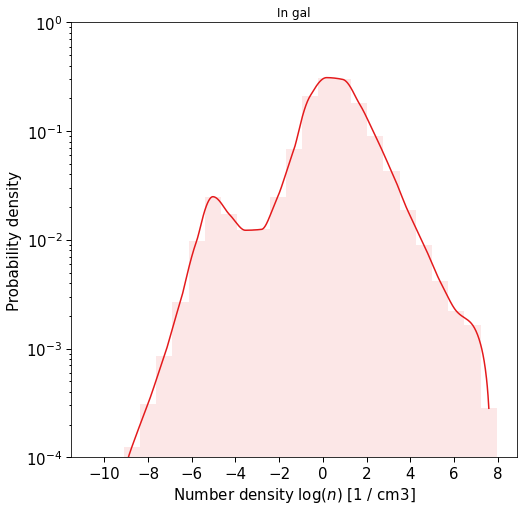

6752561


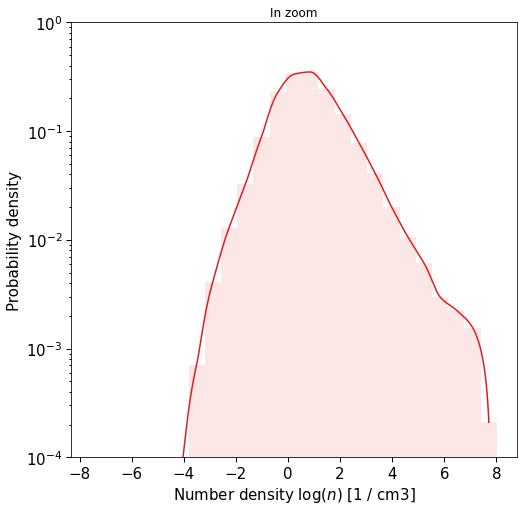

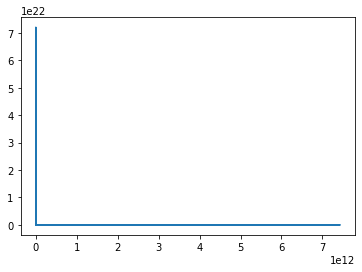

In [36]:

def plot_ndensity_PDFs(masses,
                       ndens,
                       ndensity_unit=u.cm**-3,
                       bins=None,
                       colors=None,
                       linestyles=None,
                       linewidths=None,
                       labels=None,
                       cumulative=False,
                       fit_spline=False,
                       only_spline=False,
                       title = None,
                       save=None,
                       **kwargs):
    """
    
    Plot the mass-weighted logarithmic probability distribution function (PDF)
    or cumulative distribution function (CDF) histograms of the number density 
    of AREPO Voronoi grids.
    
    Make sure to put things in LISTS!!! i expect LISTS !!!
    
    """
    #Check Dtype
    if not type(masses)==list:
        print('mesh data MUST be in a list. TY!')
        exit()
    
    #Figure properties
    nsols = len(masses)
    if colors is None:
        cmap = plt.cm.Set1
        colors = cmap(np.arange(nsols)%cmap.N)
    if linestyles is None:
        linestyles = ["-"]*nsols
    if linewidths is None:
        linewidths = [1.5]*nsols
    if labels is None:
        labels = [fr"${i}$" for i in np.arange(1,nsols+1)]
    if bins is None:
        bins = [25]*nsols

    #Main figure
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_yscale('log')
    #Axes ticks
    ax.xaxis.set_tick_params(which='major', width=1, length=5, labelsize=15)
    ax.xaxis.set_tick_params(which='minor', width=1, length=2.5, labelsize=10)
    plt.xticks([-10,-8,-6,-4,-2,0,2,4,6,8])
    ax.yaxis.set_tick_params(which='major', width=1, length=5, labelsize=15)
    ax.yaxis.set_tick_params(which='minor', width=1, length=2.5, labelsize=10)
    ax.set_xlabel(r"Number density log($n$) [{}]".format(ndensity_unit.to_string()),fontsize=15)
    if(cumulative):
        ax.set_ylabel(r"Cumulative probability density",fontsize=15)
    else:
        ax.set_ylabel(r"Probability density",fontsize=15)
    #Figure title
    if title is not None:
        ax.set_title(str(title))
    bars = []
    lines = []
        
    for mass, nrho, bin, c, ls, lw, la in zip(masses, ndens, bins, colors, linestyles, linewidths, labels):
        
        log_ndens = np.log10(nrho, out=np.zeros_like(nrho), where=(nrho>0))
        hist, bin_edges = np.histogram(log_ndens, bins=bin, weights=mass, density=True)

        #mass-weighted PDF of the density distribution (see Burkhart, 2018)
        #rho_avg = np.average(AVG.rho,weights=AVG.mass[AVG.gas_ids])
        #s = np.log10(AVG.rho/rho_avg, out=np.zeros_like(AVG.rho), where=(AVG.rho>0))
        #hist, bin_edges = np.histogram(s, bins=25, weights=AVG.mass[AVG.gas_ids], density=True)

        x = bin_edges[:-1]
        y = hist

        if(cumulative):
            y = np.cumsum(y*np.diff(bin_edges))

        #Plotting histogram of PDF
        if(not only_spline):

            width = (max(log_ndens)-min(log_ndens))/len(x)
            bar = ax.bar(x, y, width=width, color=c, linestyle=ls, linewidth=lw, label=la, alpha=0.1)
            bars.append(bar)
        
        #Fitting cubic spline to the whole PDF
        if(fit_spline):

            spline = PchipInterpolator(x,y)
            xval = np.linspace(min(x),max(x),1000)
            yval = spline(xval)
            line, = ax.plot(xval, yval, color=c, linestyle=ls, linewidth=lw, label=la)
            lines.append(line)
            
    #ax.axvline(x=2.0,color='k',linestyle='--')

    ############### Plotting end ################

    #Axes limits
    #ax.set_xlim(-2,6)
    ax.set_ylim(1e-4,1)
    if save is not None:
        fig.savefig(save, bbox_inches='tight', dpi=100)
    plt.show()
    return 

def plot_log_histogram(arrays,
                       bins='auto',
                       colors=None,
                       linestyles=None,
                       linewidths=None,
                       labels=None,
                       title = None,
                       xlabel = None,
                       save=None,
                       **kwargs):

    """
    A general function to plot histograms of data on a log scale.

    Make sure to put things in LISTS!!! i expect LISTS !!!
    """
    
    #Check Dtype
    if not type(arrays)==list:
        print('data MUST be in a list. TY!')
        exit()

    #Figure properties
    nsols = len(arrays)
    if colors is None:
        cmap = plt.cm.Set1
        colors = cmap(np.arange(nsols)%cmap.N)
    if linestyles is None:
        linestyles = ["-"]*nsols
    if linewidths is None:
        linewidths = [1.5]*nsols
    if labels is None:
        labels = [fr"${i}$" for i in np.arange(1,nsols+1)]

    #Main figure
    fig = plt.figure(figsize=(8,8))
    if "figure" in kwargs:
        plt.setp(fig,**kwargs["figure"])
        
    ax = fig.add_subplot(111)
    if title is not None:
        ax.set_title(str(title))
        
    #Grid
        
    #Axes scales
    ax.set_xscale('log')
    ax.set_yscale('log')  
        
    #Axes ticks
    ax.xaxis.set_tick_params(which='major', width=1, length=5, labelsize=15)
    ax.xaxis.set_tick_params(which='minor', width=1, length=2.5, labelsize=10)
    ax.yaxis.set_tick_params(which='major', width=1, length=5, labelsize=15)
    ax.yaxis.set_tick_params(which='minor', width=1, length=2.5, labelsize=10)

    #Axes labels
    ax.set_xlabel(r"$x$",fontsize=15)
    ax.set_ylabel(r"$y$",fontsize=15)
    if xlabel is not None:
        ax.set_xlabel(xlabel)

    ############### Plotting start ################

    hists = []

    arrays_flattened = np.array([item for sublist in arrays for item in sublist])
    if bins == 'auto':
        bins=np.logspace(np.log10(arrays_flattened.min()), np.log10(arrays_flattened.max()))
    else:
        bins=np.logspace(np.log10(arrays_flattened.min()), np.log10(arrays_flattened.max()), bins)

    for arr, c, ls, lw, la in zip(arrays, colors, linestyles, linewidths, labels):
        hist = ax.hist(arr, bins=bins, edgecolor=c, label=la, linestyle = ls, linewidth = lw, color=c, alpha = 0.4,
                       histtype='stepfilled', stacked=True, density=True) #'step' fro multiple things on 1 fig
        hists.append(hist)

    ############### Plotting end ################

    #Axes limits
    #ax.set_xlim(1e-2,1e+2)
    #ax.set_ylim(1e-3,1)
    if save is not None:
        fig.savefig(save, bbox_inches='tight', dpi=100)
    plt.show()
    return 

plot_log_histogram([(sink_mass*Arepo_mass.to(u.Msun)).value],
                       bins=30,
                       colors=None,
                       linestyles=None,
                       linewidths=None,
                       labels=None,
                       title = 'Sink Mass Distribution',
                       xlabel = 'Sink Mass [Msun]',
                       save=None,
                       )

x = loc[:,0]
y = loc[:,1]
z = loc[:,2]
 
xmin, xmax, ymin, ymax, zmin, zmax = [1280, 1520,1280, 1520, 1280, 1520]
BOUNDS_MASK = ((x > xmin) &
               (x < xmax) &
               (y > ymin) &
               (y < ymax) &
               (z > zmin) &
               (z < zmax))
        
ingalmass = mass[BOUNDS_MASK]
ingalndens = ndens[BOUNDS_MASK]
print(len(ingalmass))
plot_ndensity_PDFs(masses = [ingalmass],
                       ndens = [ingalndens],
                       ndensity_unit=u.cm**-3,
                       bins=None,
                       colors=None,
                       linestyles=None,
                       linewidths=None,
                       labels=None,
                       cumulative=False,
                       fit_spline=True,
                       only_spline=False,
                       title = 'In gal',
                       save=None)

xmin, xmax, ymin, ymax, zmin, zmax = [1481, 1488, 1398, 1405, 1396.5, 1403.5]

BOUNDS_MASK = ((x > xmin) &
               (x < xmax) &
               (y > ymin) &
               (y < ymax) &
               (z > zmin) &
               (z < zmax))
        
inzoommass = mass[BOUNDS_MASK]
inzoomndens = ndens[BOUNDS_MASK]
print(len(inzoommass))
plot_ndensity_PDFs(masses = [inzoommass],
                       ndens = [inzoomndens],
                       ndensity_unit=u.cm**-3,
                       bins=None,
                       colors=None,
                       linestyles=None,
                       linewidths=None,
                       labels=None,
                       cumulative=False,
                       fit_spline=True,
                       only_spline=False,
                       title = 'In zoom',
                       save=None)


plt.plot(rho, cell_radius)
plt.show()

0.006203348937687918 pc


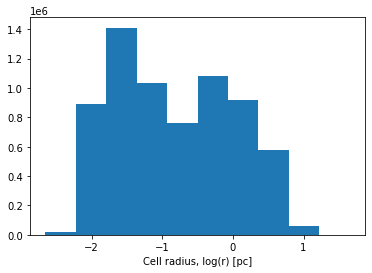

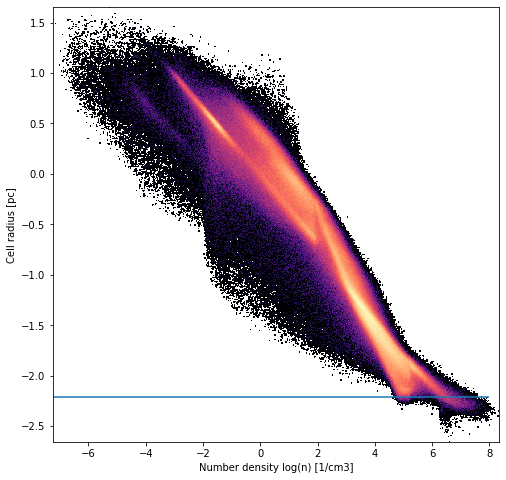

In [14]:
#ndens = ((rho*Arepo_mass/(Arepo_length**3))/mp).to(u.cm**-3).value
log_ndens = np.log10(ndens, out=np.zeros_like(ndens), where=(ndens>0))
cell_vol = mass/rho

x = loc[:,0]
y = loc[:,1]
z = loc[:,2]
xmin, xmax, ymin, ymax, zmin, zmax = [1481, 1488, 1398, 1405, 1396.5, 1403.5]

BOUNDS_MASK = ((x > xmin) &
               (x < xmax) &
               (y > ymin) &
               (y < ymax) &
               (z > zmin) &
               (z < zmax))
        


#r = cell_radius*Arepo_length.to(u.pc)

#

print((((1e-12*3/(4*np.pi)))**(1/3)*(Arepo_length)).to(u.pc))
cell_radius = (((cell_vol*3/(4*np.pi))*(Arepo_length**3))**(1/3)).to(u.pc)
inzoomradius = cell_radius[BOUNDS_MASK]
#plt.hist(np.log10(cell_radius.value))
plt.hist(np.log10(inzoomradius.value))
plt.xlabel('Cell radius, log(r) [pc]')
plt.show()

inzoomlogndes = log_ndens[BOUNDS_MASK]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
norm = mpl.colors.LogNorm()
bins=1000
ax.hist2d(inzoomlogndes, np.log10(inzoomradius.value), cmap='magma', norm=norm, bins=bins)
#plt.yscale('log')
plt.hlines(np.log10(0.0062), -10, 8)
plt.ylabel('Cell radius [pc]')
plt.xlabel('Number density log(n) [1/cm3]')
plt.show()


#min r = 0.0022129377302601994 pc , min v = 4.53971875162389e-14 [Arepolength^3]

In [37]:
a = (4/3)*np.pi*(0.0022129377302601994*u.pc)**3
a = a.to(Arepo_length**3)
print(a)

4.5397187516238606e-14 2.93778e+61 cm3


[2, 2, 2, 2, 2, 2]
True
z
15061792 15061792 15061792



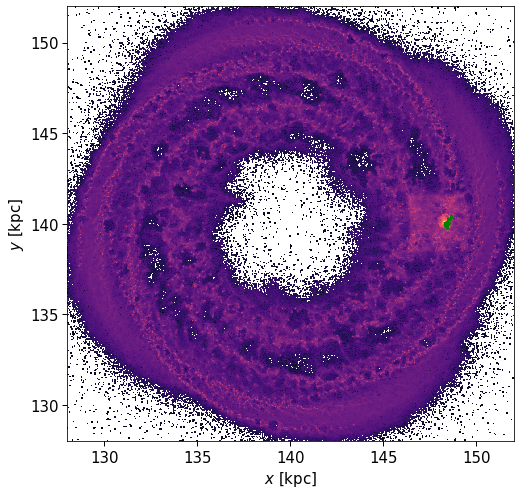

z
11400060 11400060 11400060



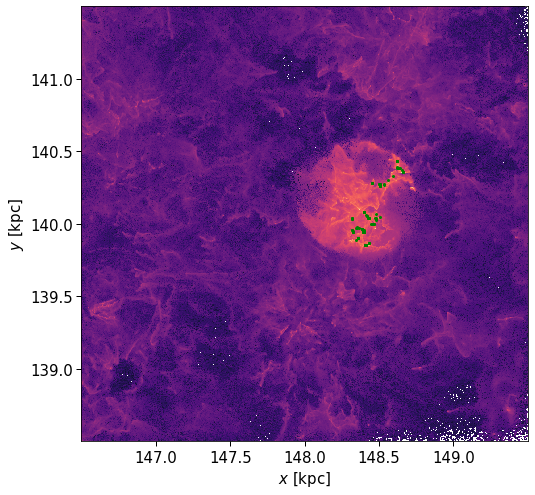

z
7069947 7069947 7069947



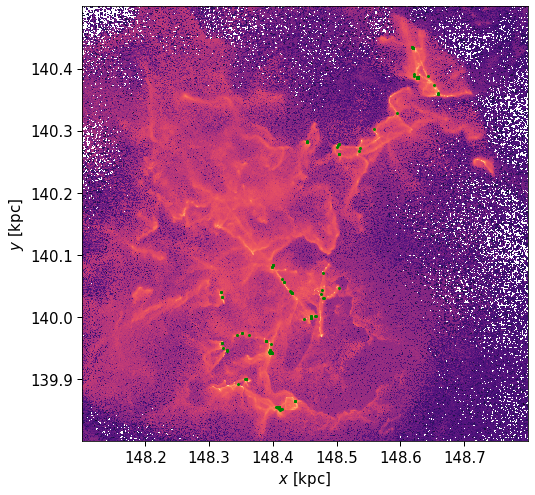

x
7013829 7013829 7013829



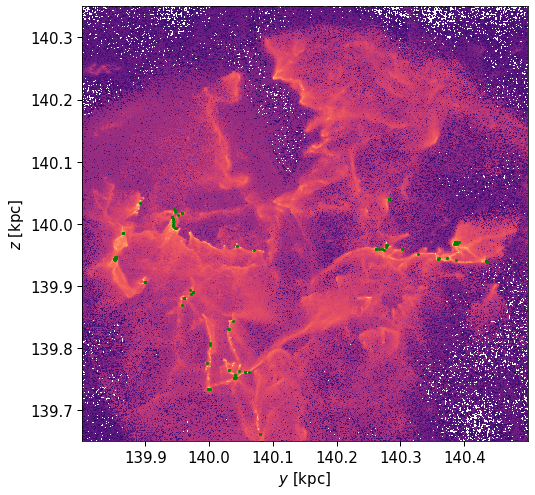

z
7069947 7069947 7069947



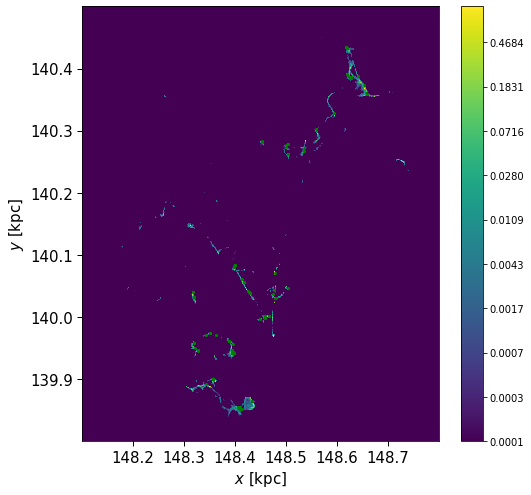

z
2147086 2147086 2147086



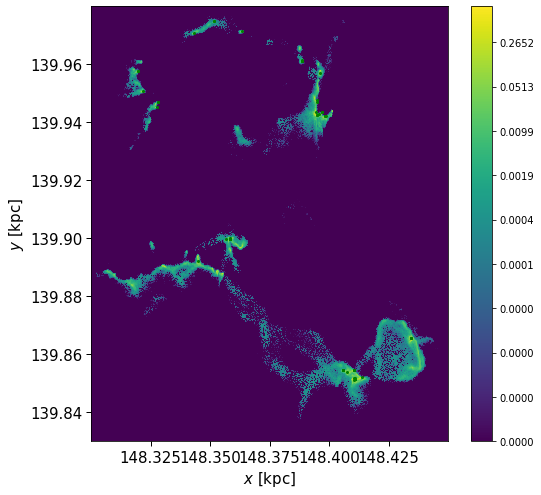

"\nnum = [250, 251, 252, 253]\nABHE = 0.1\nfor num in num:\n    ColumnDensity = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_'+str(num))\n    xHp = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xHP_proj_'+str(num))\n    xH2 = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xH2_proj_'+str(num))\n    xCO = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xCO_proj_'+str(num))\n\n    NH = (ColumnDensity * rsnap.arepoColumnDensity) / ((1.+4.*ABHE)*cgs.mp)\n\n    Ndensity = NH * (1. + ABHE - xH2 + xHp)\n\n    plt.imshow(np.log10(Ndensity), origin='lower', cmap = 'magma')\n    plt.show()\n    "

In [7]:
a = [1,1,1,1,1,1]#
print([2*i for i in a])




def bin_image(loc, 
              weights, 
              bounds, 
              projection, 
              sinks_loc = None, 
              show_sinks = None, 
              length_unit=u.cm, 
              cbar = False, 
              cmap='magma', 
              ndensity_cut = False):
    
    norm = mpl.colors.LogNorm()
    bins=1000
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.xaxis.set_tick_params(which='major', width=1, length=5, labelsize=15)
    ax.xaxis.set_tick_params(which='minor', width=1, length=2.5, labelsize=10)
    ax.yaxis.set_tick_params(which='major', width=1, length=5, labelsize=15)
    ax.yaxis.set_tick_params(which='minor', width=1, length=2.5, labelsize=10)
    print(projection)
    if(projection=='x' or projection=='X'):
        (xaxis, yaxis) = (1,2)
        ax.set_xlabel(r"$y$ [{}]".format(length_unit.to_string()),fontsize=15)
        ax.set_ylabel(r"$z$ [{}]".format(length_unit.to_string()),fontsize=15)
    elif(projection=='y' or projection=='Y'):
        (xaxis, yaxis) = (0,2)
        ax.set_xlabel(r"$x$ [{}]".format(length_unit.to_string()),fontsize=15)
        ax.set_ylabel(r"$z$ [{}]".format(length_unit.to_string()),fontsize=15)
    elif(projection=='z' or projection=='Z'):
        (xaxis, yaxis) = (0,1)
        ax.set_xlabel(r"$x$ [{}]".format(length_unit.to_string()),fontsize=15)
        ax.set_ylabel(r"$y$ [{}]".format(length_unit.to_string()),fontsize=15)
    else:
        raise ValueError(utils._prestring() + "Invalid projection.")
    x = loc[:,xaxis]*Arepo_length.to(length_unit)
    y = loc[:,yaxis]*Arepo_length.to(length_unit)
    if bounds is not None:
        #bounds = #u.Quantity(bounds,unit=length_unit).value
        xmin, xmax, ymin, ymax = bounds*length_unit
        BOUNDS_MASK = ((x > xmin) &
                       (x < xmax) &
                       (y > ymin) &
                       (y < ymax))
        x = x[BOUNDS_MASK]
        y = y[BOUNDS_MASK]
        weights = weights[BOUNDS_MASK]
        #ax.set_aspect((ymax-ymin)/(xmax-xmin))
    print(len(weights), len(x), len(y))
    print()
    if ndensity_cut is not False:
        levels=np.logspace(ndensity_cut[0],ndensity_cut[1],256)
        norm=mc.BoundaryNorm(levels,256)
    hist2d = ax.hist2d(x.value, y.value, cmap=cmap, norm=norm, bins=bins, weights=weights)
    if cbar:
        fig.colorbar(hist2d[3], ax=ax)
    if show_sinks is not None:
        #Shedding units for ease of use
        
        x = sinks_loc[:,xaxis]*Arepo_length.to(length_unit)
        y = sinks_loc[:,yaxis]*Arepo_length.to(length_unit)
        ax.scatter(x, y, s=4, c='green', zorder=2)
    plt.savefig('Save.png')
    plt.show()
    return



sink_locs = data['pos'][-163:]
sink_mass = data['mass'][-163:]
sink_x = sink_locs[:,0]
sink_y = sink_locs[:,1]
sink_z = sink_locs[:,2]

loc = data['pos'][:-163]
rho = data['rho'] #[:-163]
print(len(rho) == len(loc))
#x = loc[:,0]
#y = loc[:,1]
#z = loc[:,2]

#tils.check_unit(length_unit, u.cm)

bounds = [[128, 152,128, 152], [146.5, 149.5, 138.5, 141.5], [148.1, 148.8, 139.8, 140.5], [ 139.8, 140.5, 139.65,140.35]]#, [1483, 1484.5, 1399, 1400.5]] #None

proj = [ 'z', 'z', 'z', 'x']
density_cut = [False, False, False, False]
for i in range(4):
    
    bin_image(loc = loc, 
              weights = ndens, 
              bounds = bounds[i], 
              projection = proj[i], 
              show_sinks = True, 
              sinks_loc = sink_locs, 
              length_unit = u.kpc, 
              cmap = 'magma', 
              ndensity_cut = density_cut[i] )
    #bin_image(loc = loc, weights = rho, bounds = bounds[i], projection = proj[i], show_sinks = True, sinks_loc = sink_locs, length_unit = u.kpc )

#bin_image(loc = loc, rho, [1483, 1484.5, 1399, 1400.5], )
#bin_image(loc = loc, weights = xCO, bounds = bounds[0], projection = proj[0], show_sinks = False, sinks_loc = sink_locs, length_unit = u.kpc, cmap = 'viridis' )
bin_image(loc = loc, 
          weights = xCO, 
          bounds = bounds[2], 
          projection = proj[2], 
          show_sinks = False, 
          sinks_loc = sink_locs, 
          length_unit = u.kpc, 
          cmap = 'viridis',
          ndensity_cut = [-4,0],
          cbar = True)
lims = [148.3, 148.45, 139.83, 139.98]
bin_image(loc = loc, 
          weights = xCO, 
          bounds = lims, 
          projection = 'z', 
          show_sinks = False, 
          sinks_loc = sink_locs, 
          length_unit = u.kpc, 
          cmap = 'viridis',
          ndensity_cut = [-7,0],
          cbar = True)

'''
num = [250, 251, 252, 253]
ABHE = 0.1
for num in num:
    ColumnDensity = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_'+str(num))
    xHp = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xHP_proj_'+str(num))
    xH2 = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xH2_proj_'+str(num))
    xCO = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xCO_proj_'+str(num))

    NH = (ColumnDensity * rsnap.arepoColumnDensity) / ((1.+4.*ABHE)*cgs.mp)

    Ndensity = NH * (1. + ABHE - xH2 + xHp)

    plt.imshow(np.log10(Ndensity), origin='lower', cmap = 'magma')
    plt.show()
    '''

Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_250
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xHP_proj_250
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xH2_proj_250
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xCO_proj_250
1000 1000


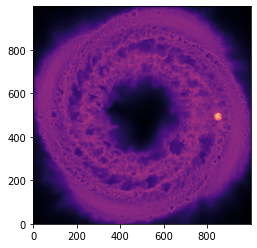

Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_251
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xHP_proj_251
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xH2_proj_251
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xCO_proj_251
1000 1000


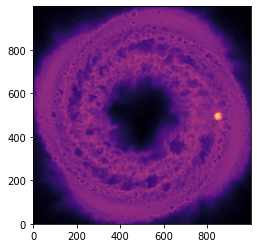

Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_252
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xHP_proj_252
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xH2_proj_252
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xCO_proj_252
1000 1000


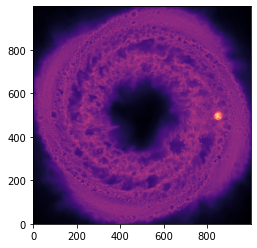

Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_253
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xHP_proj_253
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xH2_proj_253
1000 1000
Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/xCO_proj_253
1000 1000


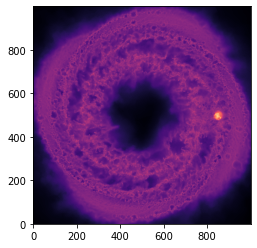

In [5]:
num = [250, 251, 252, 253]
ABHE = 0.1
for num in num:
    ColumnDensity = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_'+str(num))
    xHp = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xHP_proj_'+str(num))
    xH2 = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xH2_proj_'+str(num))
    xCO = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/xCO_proj_'+str(num))

    NH = (ColumnDensity * rsnap.arepoColumnDensity) / ((1.+4.*ABHE)*cgs.mp)

    Ndensity = NH * (1. + ABHE - xH2 + xHp)

    plt.imshow(np.log10(Ndensity), origin='lower', cmap = 'magma')
    plt.show()

In [6]:
num = [250, 251, 252, 253]
ABHE = 0.1
for num in num:
    #ColumnDensity = rsnap.read_image('/cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_'+str(num))
    filename = '/cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_'+str(num)
    f = open(filename, mode='rb')
    print ("Loading file %s" % filename)
    npix_x = np.fromfile(f, np.uint32, 3)
    #npix_y = np.fromfile(f, np.uint32, )
    print(npix_x, npix_y)
    npix_x=int(npix_x)
    npix_y=int(npix_y)
    
    print (npix_x, npix_y)
    arepo_image = np.fromfile(f, np.float32, npix_x*npix_y).reshape((int(npix_x), int(npix_y)))
    #arepo_image = np.rot90(arepo_image)
    f.close()
    plt.imshow(np.log10(arepo_image), origin='lower', cmap = 'magma')
    #plt.imshow(np.log10(ColumnDensity), origin='lower', cmap = 'magma')
    plt.show()
#print(np.shape(Ndensity))

Loading file /cosma7/data/dp058/dc-mari5/example_run/snapshots/density_proj_250


NameError: name 'npix_y' is not defined